# Solving the n-Queens Problem using Local Search

Student Name: Cameron Ervin

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: CE

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random
import pandas as pd
import math

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


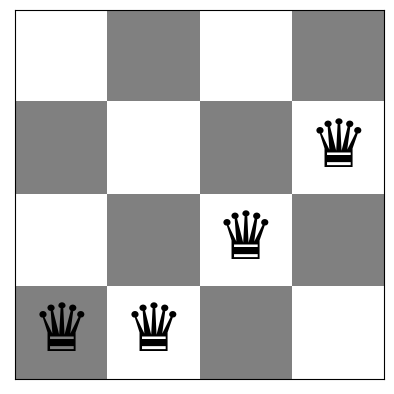

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


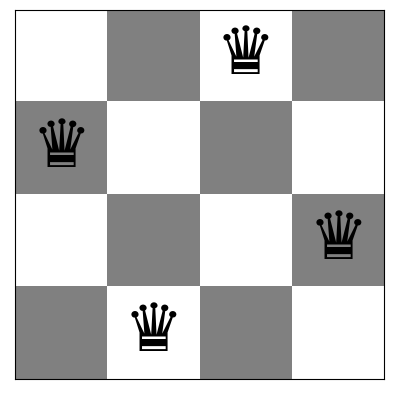

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [4]:
def steepest(board, verb = True):
    # create copy of board
    bc = np.copy(board)

    # while sol is true loop
    sol = True
    opt = False
    while sol:
        # create dict of neighbors with conflicts as key
        nbr_dict = {}
        # create copy of board as neighbor board
        nbr = np.copy(bc)

        # nested for loop to loop through each column and row
        for i in range(len(bc)):
            for j in range(len(bc)):
                # change col i to value j
                nbr[i] = j
                # if conflicts less than board copy add to dict
                if conflicts(nbr) <= conflicts(bc):
                    nbr_dict[conflicts(nbr)] = nbr
                # reestablish neighbor board to have same starting point
                nbr = np.copy(bc)
        # if local min found, stop
        if conflicts(bc) == min(nbr_dict.keys()):
            if verb:
                print('local optimum found, global optimum not found')
            sol = False
        # board copy is the neighbor with the lowest conflicts
        bc = nbr_dict[min(nbr_dict.keys())]
        # if conflicts is zero, global optimum found, stop
        if conflicts(bc) == 0:
            if verb:
                print('global/local optimum found')
            opt = True
            sol = False
    return [opt,bc]

In [5]:
board = random_board(4)
steepest(board)

global/local optimum found


[True, array([2, 0, 3, 1])]

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [6]:
def stochastic(board, verb = True):
    bc = np.copy(board)
    sol = True
    opt = False
    while sol:
        nbr_dict = {}
        nbr = np.copy(bc)
        for i in range(len(bc)):
            for j in range(len(bc)):
                nbr[i] = j
                if conflicts(nbr) <= conflicts(bc):
                    nbr_dict[conflicts(nbr)] = nbr
                nbr = np.copy(bc)
        if conflicts(bc) == min(nbr_dict.keys()):
            if verb:
                print('local optimum found, global optimum not found')
            sol = False
        # choose next board randomly from dict of neighbors
        bc = nbr_dict[random.choice(list(nbr_dict.keys()))]
        if conflicts(bc) == 0:
            if verb:
                print('global/local optimum found')
            opt = True
            sol = False
    return [opt,bc]

In [7]:
board = random_board(4)
stochastic(board)

global/local optimum found


[True, array([2, 0, 3, 1])]

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [81]:
def first_choice(board, verb = True, tries = 50):
    bc = np.copy(board)
    sol = True
    opt = False
    n = 0
    while sol:
        nbr = np.copy(bc)
        length = [i for i in range(len(bc))]
        # randomly shuffle rows and columns
        random.shuffle(length)
        for i in length:
            find = False
            random.shuffle(length)
            for j in length:
                nbr[i] = j
                # if first choice has less conflicts than current board, board copy is first choice
                if conflicts(nbr) < conflicts(bc):
                    n = 0
                    bc = np.copy(nbr)
                    find = True
                    break
                # if conflicts of neighbor are greater than or equal to current board add one to n, if n is more than tries, found local optimum
                elif conflicts(nbr) >= conflicts(bc):
                    n += 1
                    if n >= tries:
                        find = True
                        break
                nbr = np.copy(bc)
            if find:
                break

        if n >= tries:         
            if verb:
                print('local optimum found, global optimum not found')
            sol = False

        if conflicts(bc) == 0:
            if verb:
                print('global/local optimum found')
            opt = True
            sol = False
    return [opt,bc]


In [107]:
board = random_board(4)
first_choice(board)


local optimum found, global optimum not found


[False, array([0, 2, 3, 1])]

In [66]:
board = random_board(8)
first_choice(board)

local optimum found, global optimum not found


[False, array([3, 5, 0, 7, 7, 5, 6, 2])]

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [372]:
def random_restart(board, alg = steepest, verb = False, tries = 5, p = False):
    bc = np.copy(board)
    board_len = len(board)
    sol = False
    
    if alg != first_choice:
        # first argument returned from funnction is boolean for T/F
        opt = alg(bc,verb)[0]
        current_bc = alg(bc,verb)[1]
        # if found optimum solution, return solution
        if opt == True:
            if p:
                print('global/local optimum found')
            return [opt,current_bc]
        # else, create new random state and call function again
        else:
            # try 100 times to find an optimum solution
            for i in range(100):
                bc = np.copy(random_board(board_len))
                opt = alg(bc,verb)[0]
                current_bc = alg(bc,verb)[1]
                if opt == False:
                    continue
                elif opt == True:
                    sol = True
                    if p:
                        print('global/local optimum found')
                    return [opt,current_bc]
    # parameters for first_choice is different, so have different call to function
    else:
        opt = alg(bc,verb, tries)[0]
        current_bc = alg(bc,verb, tries)[1]
        if opt == True:
            if p:
                print('global/local optimum found')
            return [opt,current_bc]
        else:
            for i in range(100):
                bc = np.copy(random_board(board_len))
                opt = alg(bc,verb,tries)[0]
                current_bc = alg(bc,verb,tries)[1]
                if opt == False:
                    continue
                elif opt == True:
                    sol = True
                    if p:
                        print('global/local optimum found')
                    return [opt,current_bc]
    # if optimum solution not found, sol = false and return local optimum solution
    if sol == False:
        if p:
            print('local optimum found, global optimum not found')
        return [opt,bc]


In [12]:
board = random_board(4)
random_restart(board, alg=first_choice)

global/local optimum found


[True, array([0, 3, 0, 2])]

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [13]:
def classic(t0,t):
    return t0*(1/math.log(1+t))

In [14]:
def fast(t0,t):
    return t0*(1/(1+t))

In [304]:
def exponential(t0,t,a):
    if a < 0.8 or a > 1:
        print('Improper a parameter. a must be between 0.8 and 1')
        return
    return t0*(a**(t))

In [404]:
def simulated_annealing(board, t0 = 20 , a = 0.99, ep = 0.01, schedule = exponential, verb = False):
    bc = np.copy(board)
    opt = False
    t = 1

    while t < math.inf:
        # call schedule function
        if schedule != exponential:
            T = schedule(t0,t)
        # exponential schedule is different
        else:
            T = schedule(t0,t,a)

        # loop until T is less than epsilon parameter
        if T < ep:
            if conflicts(bc) == 0:
                if verb:
                    print('global/local optimum found')
                opt = True
                return [opt,bc]
            if verb:
                print('local optimum found, global optimum not found')
            return [opt,bc]
        nbr_dict = {}
        nbr = np.copy(bc)
        for i in range(len(bc)):
            for j in range(len(bc)):
                nbr[i] = j
                nbr_dict[conflicts(nbr)] = nbr
                nbr = np.copy(bc)
        # randomly select successor of current
        next = nbr_dict[random.choice(list(nbr_dict.keys()))]

        # e is difference in conflicts
        e = conflicts(bc) - conflicts(next)
        # if e is greater thanb 0, take
        if e > 0: 
            bc = np.copy(next)
        # else, there is chance to take given cooling schedule
        else: 
            prob = random.random()
            if prob <= math.exp(e/T):
                bc = np.copy(next)
        t+=1

In [302]:
board = random_board(4)
simulated_annealing(board)

local optimum found, global optimum not found


[False, array([2, 0, 1, 3])]

In [324]:
board = random_board(4)
simulated_annealing(board, schedule = fast)

global/local optimum found


[True, array([1, 3, 0, 2])]

In [314]:
board = random_board(4)
simulated_annealing(board, schedule = exponential)

global/local optimum found


[True, array([2, 0, 3, 1])]

In [344]:
import timeit

# parameter tuning for schedule type
N = 100
classic_4 = timeit.timeit('simulated_annealing(random_board(4), schedule=classic, verb=False)', number = N, globals = globals())
avg_classic_4 = (classic_4/N*1e3)

fast_4 = timeit.timeit('simulated_annealing(random_board(4), schedule=fast, verb=False)', number = N, globals = globals())
avg_fast_4 = (fast_4/N*1e3)

exponential_4 = timeit.timeit('simulated_annealing(random_board(4), schedule=exponential, verb=False)', number = N, globals = globals())
avg_exponential_4 = (exponential_4/N*1e3)


In [346]:
schedules = [classic, fast, exponential]
times = [avg_classic_4, avg_fast_4, avg_exponential_4]

idx = -1
# fast has the fastest runtime of 1.3 ms followed by exponential at 3.06 ms
for schedule in schedules:
    idx += 1
    print(f'Schedule {schedule} has a runtime of {times[idx]}')

Schedule <function classic at 0x7fb318fd4940> has a runtime of 3189.51132582999
Schedule <function fast at 0x7fb318fd4c10> has a runtime of 1.3164920800045365
Schedule <function exponential at 0x7fb308487160> has a runtime of 3.0557874999794876


In [343]:
schedules = [classic, fast, exponential]
schedules_acc = [0,0,0]
N = 100
idx = -1

for schedule in schedules:
    idx += 1
    for i in range(N):
        if simulated_annealing(random_board(4), schedule=schedule, verb=False)[0] == True:
            schedules_acc[idx] += 1

for i in range(3):
    schedules_acc[i] = schedules_acc[i]/N

# exponential and classic have the highest accuracies of about 31-32%
# choose to use exponential for a balance of accuracy and low runtime
idx = -1
for schedule in schedules:
    idx += 1
    print(f'Schedule {schedule} has an accuracy of {schedules_acc[idx]}')

Schedule <function classic at 0x7fb318fd4940> has an accuracy of 0.32
Schedule <function fast at 0x7fb318fd4c10> has an accuracy of 0.13
Schedule <function exponential at 0x7fb308487160> has an accuracy of 0.31


In [354]:
# parameter tuning for t0

t = [0.001, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50]
t_acc = [0,0,0,0,0,0,0,0,0]
N = 500
idx = -1

for t0 in t:
    idx += 1
    for i in range(N):
        if simulated_annealing(random_board(4), t0=t0, schedule=exponential, verb=False)[0] == 1:
            t_acc[idx] += 1

for i in range(9):
    t_acc[i] = t_acc[i]/N

# using a t0 of 20 has the highest accuracy
t_acc

[0.016, 0.306, 0.292, 0.288, 0.312, 0.394, 0.42, 0.438, 0.418]

In [356]:
# parameter tuning for ep
ep = [0.001, 0.01, 0.1, 0.5]
ep_acc = [0,0,0,0]
N = 500
idx = -1

for e in ep:
    idx += 1
    for i in range(N):
        if simulated_annealing(random_board(4), t0=20, ep=e, schedule=exponential, verb=False)[0] == 1:
            ep_acc[idx] += 1

for i in range(4):
    ep_acc[i] = ep_acc[i]/N

# 0.01 has the highest accuracy
ep_acc

[0.424, 0.432, 0.402, 0.284]

In [361]:
# parameter tuning for a since we chose exponential
a = [0.8,0.9,.99]
a_acc = [0,0,0]
N = 500
idx = -1

for _a in a:
    idx += 1
    for i in range(N):
        if simulated_annealing(random_board(4), t0=20, a=_a, ep=0.01, schedule=exponential, verb=False)[0] == 1:
            a_acc[idx] += 1

for i in range(3):
    a_acc[i] = a_acc[i]/N

# 0.99 has the highest accuracy
a_acc

[0.342, 0.428, 0.744]

I chose to use the following parameters for my simulated annealing algorithm: 

t0 = 0.01

a = 0.99

ep = 0.01

schedule = exponential

I chose these parameters because they offer the highest accuracy from the simulated algorithm in a low runtime compared to the classic scheduling algorithm.

## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms.

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [405]:
import timeit

# find average runtimes for algorithms, first non random restart and then for random restart, board size = 4
N = 100
steep_4 = timeit.timeit('steepest(random_board(4), verb = False)', number = N, globals = globals())
avg_steep_4 = (steep_4/N*1e3)

stoch_4 = timeit.timeit('stochastic(random_board(4), verb = False)', number = N, globals = globals())
avg_stoch_4 = (stoch_4/N*1e3)

fc_4 = timeit.timeit('first_choice(random_board(4), verb = False)', number = N, globals = globals())
avg_fc_4 = (fc_4/N*1e3)

sima_4 = timeit.timeit('simulated_annealing(random_board(4), verb = False)', number = N, globals = globals())
avg_sima_4 = (sima_4/N*1e3)

rr_steep_4 = timeit.timeit('random_restart(random_board(4), alg = steepest, verb = False, p = False)', number = N, globals = globals())
avg_rr_steep_4 = (rr_steep_4/N*1e3)

rr_stoch_4 = timeit.timeit('random_restart(random_board(4), alg = stochastic, verb = False, p = False)', number = N, globals = globals())
avg_rr_stoch_4 = (rr_stoch_4/N*1e3)

rr_fc_4 = timeit.timeit('random_restart(random_board(4), alg = first_choice, verb = False, p = False)', number = N, globals = globals())
avg_rr_fc_4 = (rr_fc_4/N*1e3)

rr_sima_4 = timeit.timeit('random_restart(random_board(4), alg = simulated_annealing, verb = False, p = False)', number = N, globals = globals())
avg_rr_sima_4 = (rr_sima_4/N*1e3)

In [406]:
# find average runtimes for algorithms, first non random restart and then for random restart, board size = 8
steep_8 = timeit.timeit('steepest(random_board(8), verb = False)', number = N, globals = globals())
avg_steep_8 = (steep_8/N*1e3)

stoch_8 = timeit.timeit('stochastic(random_board(8), verb = False)', number = N, globals = globals())
avg_stoch_8 = (stoch_8/N*1e3)

fc_8 = timeit.timeit('first_choice(random_board(8), verb = False)', number = N, globals = globals())
avg_fc_8 = (fc_8/N*1e3)

sima_8 = timeit.timeit('simulated_annealing(random_board(8), verb = False)', number = N, globals = globals())
avg_sima_8 = (sima_8/N*1e3)

rr_steep_8 = timeit.timeit('random_restart(random_board(8), alg = steepest, verb = False, p = False)', number = N, globals = globals())
avg_rr_steep_8 = (rr_steep_8/N*1e3)

rr_stoch_8 = timeit.timeit('random_restart(random_board(8), alg = stochastic, verb = False, p = False)', number = N, globals = globals())
avg_rr_stoch_8 = (rr_stoch_8/N*1e3)

rr_fc_8 = timeit.timeit('random_restart(random_board(8), alg = first_choice, verb = False, p = False)', number = N, globals = globals())
avg_rr_fc_8 = (rr_fc_8/N*1e3)

rr_sima_8 = timeit.timeit('random_restart(random_board(8), alg = simulated_annealing, verb = False, p = False)', number = N, globals = globals())
avg_rr_sima_8 = (rr_sima_8/N*1e3)

In [407]:
# find accuracy for non RR algorithms board size 4
algs = [steepest, stochastic, first_choice, simulated_annealing]
algs_4 = [0,0,0,0]
idx = -1

for alg in algs:
    idx += 1
    for i in range(N):
        if alg(random_board(4), verb = False)[0] == True:
            algs_4[idx] += 1

for i in range(4):
    algs_4[i] = algs_4[i]/N

In [408]:
# find accuracy for RR algorithms board size 4
algs = [steepest, stochastic, first_choice, simulated_annealing]
algs_rr_4 = [0,0,0,0]
idx = -1

for alg in algs:
    idx +=1
    for i in range(N):
        if random_restart(random_board(4), alg=alg, verb = False, p = False)[0] == True:
            algs_rr_4[idx] += 1

for i in range(4):
    algs_rr_4[i] = algs_rr_4[i]/N

In [409]:
# find accuracy for non RR algorithms board size 8
algs = [steepest, stochastic, first_choice, simulated_annealing]
algs_8 = [0,0,0,0]
idx = -1

for alg in algs:
    idx += 1
    for i in range(N):
        if alg(random_board(8), verb = False)[0] == True:
            algs_8[idx] += 1

for i in range(4):
    algs_8[i] = algs_8[i]/N

In [410]:
# find accuracy for RR algorithms board size 8
algs = [steepest, stochastic, first_choice, simulated_annealing]
algs_rr_8 = [0,0,0,0]
idx = -1

for alg in algs:
    idx += 1
    for i in range(N):
        if random_restart(random_board(8), alg=alg, verb = False, p = False)[0] == True:
            algs_rr_8[idx] += 1

for i in range(4):
    algs_rr_8[i] = algs_rr_8[i]/N

In [191]:
# find largest board size solvable under 100 ms
i = 1
while i < math.inf:
    steep = timeit.timeit('steepest(random_board(i), verb = False)', number = N, globals = globals())
    avg_steep = (steep/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_steep < 100:
        i += 1
    else:
        steep_bs = i
        break
steep_bs = steep_bs
print('Using Steepest Ascent, the largest board solvable under 1/10th of a second is: ', steep_bs)

Using Steepest Ascent, the largest board solvable under 1/10th of a second is:  16


In [193]:
i = 1
while i < math.inf:
    stoch = timeit.timeit('stochastic(random_board(i), verb = False)', number = N, globals = globals())
    avg_stoch = (stoch/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_stoch < 100:
        i += 1
    else:
        stoch_bs = i
        break
stoch_bs = stoch_bs

In [195]:
i = 1
while i < math.inf:
    fc = timeit.timeit('first_choice(random_board(i), verb = False, tries = 200)', number = N, globals = globals())
    avg_fc = (fc/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_fc < 100:
        i += 1
    else:
        fc_bs = i
        break
fc_bs = fc_bs

In [418]:
i = 1
while i < math.inf:
    sima = timeit.timeit('simulated_annealing(random_board(i), verb = False)', number = N, globals = globals())
    avg_sima = (sima/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_sima < 100:
        i += 1
    else:
        sima_bs = i
        break
sima_bs = sima_bs

In [194]:
i = 1
while i < math.inf:
    rr_steep = timeit.timeit('random_restart(random_board(i), alg = steepest, verb = False, p = False)', number = N, globals = globals())
    avg_rr_steep = (rr_steep/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_rr_steep < 100:
        i += 1
    else:
        rr_steep_bs = i
        break
rr_steep_bs = rr_steep_bs

In [196]:
i = 1
while i < math.inf:
    rr_stoch = timeit.timeit('random_restart(random_board(i), alg = stochastic, verb = False, p = False)', number = N, globals = globals())
    avg_rr_stoch = (rr_stoch/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_rr_stoch < 100:
        i += 1
    else:
        rr_stoch_bs = i
        break
rr_stoch_bs = rr_stoch_bs

In [197]:
i = 1
while i < math.inf:
    rr_fc = timeit.timeit('random_restart(random_board(i), alg = first_choice, verb = False, tries = 200, p = False)', number = N, globals = globals())
    avg_rr_fc = (rr_fc/N*1e3)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_rr_fc < 100:
        i += 1
    else:
        rr_fc_bs = i
        break
rr_fc_bs = rr_fc_bs

In [421]:
i = 1
while i < math.inf:
    rr_sima = timeit.timeit('random_restart(random_board(i), alg = simulated_annealing, verb = False, p = False)', number = N, globals = globals())
    avg_rr_sima = (rr_sima/N*1e3)
    print(avg_rr_sima)

    # use 100 ms since it is one-tenth of a second, one-tenth of a second seems like a reasonable timeframe benchmark
    if avg_rr_sima < 100:
        i += 1
        print(i)
    else:
        rr_sima_bs = i
        break
rr_sima_bs = rr_sima_bs

0.06841750000603497
2
2.304165839959751
3
2.596579590026522
4
1.9009504199493676
5
2.4707854200096335
6
3.22083000006387
7
3.490799999999581
8
3.788206250028452
9
4.186695830067038
10
4.512934160011355
11
4.688280420014053
12
4.909901670034742
13
5.311375000019325
14
5.708357920011622
15
5.847719169978518
16
6.085861669998849
17
6.364677919991664
18
6.686131669994211
19
6.938255839995691
20
7.267207500044606
21
7.545118749985704
22
7.963828329957323
23
8.388352499969187
24
8.566326669970294
25


KeyboardInterrupt: 

The max board size under 100 ms for random restart simulated annealing is quite large, so I will not calculate.

In [416]:
rr_sima_bs = 'Large'

In [417]:
col_names = ['4x4 Board Avg Runtime (ms)','4x4 Board Avg Global Optimality %','8x8 Board Avg Runtime (ms)','8x8 Board Avg Global Optimality %','Largest Board Solvable Under 1/10th of a Second']
steep_l = [avg_steep_4, algs_4[0], avg_steep_8, algs_8[0], steep_bs]
stoch_l = [avg_stoch_4, algs_4[1], avg_stoch_8, algs_8[1], stoch_bs]
fc_l = [avg_fc_4, algs_4[2], avg_fc_8, algs_8[2], fc_bs]
sa_l = [avg_sima_4, algs_4[3], avg_sima_8, algs_8[3], sima_bs]
steep_rr_l = [avg_rr_steep_4, algs_rr_4[0], avg_rr_steep_8, algs_rr_8[0], rr_steep_bs]
stoch_rr_l = [avg_rr_stoch_4, algs_rr_4[1], avg_rr_stoch_8, algs_rr_8[1], rr_stoch_bs]
fc_rr_l = [avg_rr_fc_4, algs_rr_4[2], avg_rr_fc_8, algs_rr_8[2], rr_fc_bs]
sa_rr_l = [avg_rr_sima_4, algs_rr_4[3], avg_rr_sima_8, algs_rr_8[3], rr_sima_bs]

df = pd.DataFrame(data=[steep_l, stoch_l, fc_l, sa_l, steep_rr_l, stoch_rr_l, fc_rr_l, sa_rr_l], 
                  index=['Steepest Ascent','Stochastic','First Choice','Simulated Annealing','Random Restart Steepest Ascent','Random Restart Stochastic','Random Restart First Choice', 'Random Restart Simulated Annealing'],
                  columns=col_names)
df

,4x4 Board Avg Runtime (ms),4x4 Board Avg Global Optimality %,8x8 Board Avg Runtime (ms),8x8 Board Avg Global Optimality %,Largest Board Solvable Under 1/10th of a Second
Steepest Ascent,0.787803,0.43,8.393910,0.17,16
Stochastic,1.086435,0.31,14.951693,0.16,14
First Choice,1.415701,0.36,4.747098,0.06,26
Simulated Annealing,108.717515,0.77,676.602232,0.28,4
Random Restart Steepest Ascent,3.009330,1.00,109.415257,1.00,8
Random Restart Stochastic,7.068112,1.00,247.093019,1.00,6
Random Restart First Choice,4.309380,1.00,86.300500,0.02,2
Random Restart Simulated Annealing,1.775440,0.52,3.788328,0.00,Large


##### Analysis
Every algorithm scales poorly with problem size in some way or another. For non random restart algorithms (aside from simulated annealing), the runtime for the smaller board was rather low, however, the accuracy of finding an optimal solution was also low. Whenever the board size increases from 4x4 to a full size chess board at 8x8, the accuracy drops even lower to sub 15% for ever algorithm. The low accuracy makes sense since for the non random restart algorithms, it is very easy for these algorithms to get stuck in a local optimum. Simulated annealing has the highest golbal accuracy for the 8x8 board. This is caused by the temperature schedule that allows simulated annealing to escape local optima.

The random restart algorithms scale poorly in a different way than the non random restart algorithms. Unlike the non RR algorithms, the RR algorithms achieve a 100% accuracy rating (aside from the random restart first choice algorithm and the random restart simulated annealing algorithm). This is because, the RR algorithms randomize the initial starting state. This reduces the chance of getting caught in a local optimum given the rules the algorithm is confined by. This 100% accuracy continues even when the size of the board increases from 4x4 to 8x8. However, the runtime for each RR algorithm increases dramatically. My guess as to why the simulated annealing does not perform well with random restarts is because it essentially already accommodates variability with the temperature schedule. Whenever you add more randomization to the mix, the accuracy decreases.

See the table above for the largest board solvable in under one-tenth of a second.

## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time.

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [212]:
# one square at a time
def one_square(board, verb = True, tries = 50):
    bc = np.copy(board)
    sol = True
    opt = False
    n = 0
    while sol:
        nbr = np.copy(bc)
        length = [i for i in range(len(bc))]
        random.shuffle(length)
        for i in length:
            # randomly select either the square above or square below if not at the end of the board
            prob=random.random()
            if prob < 0.5:
                if bc[i] != len(bc)-1:
                    nbr[i] = bc[i]+1
            else:
                if bc[i] != 0:
                    nbr[i] = bc[i]-1
            random.shuffle(length)
            if conflicts(nbr) < conflicts(bc):
                n = 0
                bc = np.copy(nbr)
                break
            elif conflicts(nbr) >= conflicts(bc):
                n += 1
                if n >= tries:
                    break
            nbr = np.copy(bc)

        if n >= tries:         
            if verb:
                print('local optimum found, global optimum not found')
            sol = False

        if conflicts(bc) == 0:
            if verb:
                print('global/local optimum found')
            opt = True
            sol = False
    return [opt,bc]


In [222]:
board = random_board(4)
one_square(board)

local optimum found, global optimum not found


[False, array([2, 2, 3, 3])]

In [232]:
# switching columns
def col_switch(board, verb = True, tries = 50):
    bc = np.copy(board)
    sol = True
    opt = False
    n = 0
    while sol:
        nbr = np.copy(bc)
        length = [i for i in range(len(bc))]
        random.shuffle(length)
        for i in length:
            for j in length:
                # swap two columns
                temp = nbr[i]
                nbr[i] = nbr[j]
                nbr[j] = temp
            if conflicts(nbr) < conflicts(bc):
                n = 0
                bc = np.copy(nbr)
                break
            elif conflicts(nbr) >= conflicts(bc):
                n += 1
                if n >= tries:
                    break
            nbr = np.copy(bc)

        if n >= tries:         
            if verb:
                print('local optimum found, global optimum not found')
            sol = False

        if conflicts(bc) == 0:
            if verb:
                print('global/local optimum found')
            opt = True
            sol = False
    return [opt,bc]

In [245]:
board = random_board(4)
col_switch(board)

local optimum found, global optimum not found


[False, array([0, 2, 0, 0])]

In [246]:
# combined
def combined(board, verb = True, tries = 50):
    bc = np.copy(board)
    sol = True
    opt = False
    n = 0
    while sol:
        nbr = np.copy(bc)
        one = np.copy(nbr)
        shuffle = np.copy(nbr)
        length = [i for i in range(len(bc))]
        random.shuffle(length)
        # either swap two columns, but if moving one square is better, choose moving one square
        for i in length:
            for j in length:
                temp = shuffle[i]
                shuffle[i] = shuffle[j]
                shuffle[j] = temp
            if conflicts(shuffle) < conflicts(bc):
                n = 0
                nbr = np.copy(shuffle)
                break
            elif conflicts(shuffle) >= conflicts(bc):
                n += 1
                if n >= tries:
                    break
            nbr = np.copy(bc)

        for i in length:
            prob=random.random()
            if prob < 0.5:
                if bc[i] != len(bc)-1:
                    one[i] = bc[i]+1
            else:
                if bc[i] != 0:
                    one[i] = bc[i]-1
            random.shuffle(length)
            if conflicts(one) < conflicts(nbr):
                n = 0
                nbr = np.copy(one)
                break
            elif conflicts(shuffle) >= conflicts(bc):
                n += 1
                if n >= tries:
                    break
            nbr = np.copy(bc)
        
        bc = np.copy(nbr)


        if n >= tries:         
            if verb:
                print('local optimum found, global optimum not found')
            sol = False

        if conflicts(bc) == 0:
            if verb:
                print('global/local optimum found')
            opt = True
            sol = False
    return [opt,bc]

In [258]:
board = random_board(4)
combined(board)

local optimum found, global optimum not found


[False, array([0, 0, 3, 1])]

In [259]:
N = 100
os_4 = timeit.timeit('one_square(random_board(4), verb = False)', number = N, globals = globals())
avg_os_4 = (os_4/N*1e3)

col_switch_4 = timeit.timeit('col_switch(random_board(4), verb = False)', number = N, globals = globals())
avg_col_switch_4 = (col_switch_4/N*1e3)

combined_4 = timeit.timeit('combined(random_board(4), verb = False)', number = N, globals = globals())
avg_combined_4 = (combined_4/N*1e3)

In [260]:
os_8 = timeit.timeit('one_square(random_board(8), verb = False)', number = N, globals = globals())
avg_os_8 = (os_8/N*1e3)

col_switch_8 = timeit.timeit('col_switch(random_board(8), verb = False)', number = N, globals = globals())
avg_col_switch_8 = (col_switch_8/N*1e3)

combined_8 = timeit.timeit('combined(random_board(8), verb = False)', number = N, globals = globals())
avg_combined_8 = (combined_8/N*1e3)

In [261]:
algs = [one_square, col_switch, combined]
algs_4 = [0,0,0]
idx = -1

for alg in algs:
    idx += 1
    for i in range(N):
        if alg(random_board(4), verb = False)[0] == True:
            algs_4[idx] += 1

for i in range(3):
    algs_4[i] = algs_4[i]/N

In [262]:
algs = [one_square, col_switch, combined]
algs_8 = [0,0,0]
idx = -1

for alg in algs:
    idx += 1
    for i in range(N):
        if alg(random_board(8), verb = False)[0] == True:
            algs_8[idx] += 1

for i in range(3):
    algs_8[i] = algs_8[i]/N

In [266]:
col_names = ['4x4 Board Avg Runtime (ms)','4x4 Board Avg Global Optimality %','8x8 Board Avg Runtime (ms)','8x8 Board Avg Global Optimality %']
os_l = [avg_os_4,algs_4[0],avg_os_8,algs_8[0]]
cs_l = [avg_col_switch_4,algs_4[1],avg_col_switch_8,algs_8[1]]
comb_l = [avg_combined_4,algs_4[2],avg_combined_8,algs_8[2]]
fc_l = [avg_fc_4, algs_4[2], avg_fc_8, algs_8[2]]

df = pd.DataFrame(data=[os_l,cs_l,comb_l,fc_l],
                  index=['One Square Moves','Column Swap','One Square Moves and Column Swap Combined','First Choice'],
                  columns=col_names)
df

,4x4 Board Avg Runtime (ms),4x4 Board Avg Global Optimality %,8x8 Board Avg Runtime (ms),8x8 Board Avg Global Optimality %
One Square Moves,1.910713,0.12,4.296174,0.01
Column Swap,1.580074,0.10,3.693062,0.00
One Square Moves and Column Swap Combined,2.849413,0.28,9.131264,0.01
First Choice,1.417314,0.28,4.737328,0.01


##### Analysis
As seen in the table above, these local moves do not perform very well. The best performing out of the three new algorithms is the combined algorithm. Even with this being the best performing, it still only matches the performance of the first choice algorithm from earlier with an accuracy of about 28% with a 4x4 board and an accuracy of about 1% with an 8x8 board. Additionally, the combined algorithm has a runtime that is about twice as long as the first choice algorithm. The one square move and column swap algorithms have very low performance with an accuracy around 10% and 1% for the 4x4 and 8x8 board respectively.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here